# Task 3

#### ===============================
#### 1. Import Libraries
#### ===============================

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

#### ===============================
#### 2. Load Dataset
#### ===============================

In [4]:
df= pd.read_csv("C:\Dataset\Task 3 car data.csv")

In [6]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (301, 9)
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


#### ===============================
#### 3. Data Preprocessing
#### ===============================

In [7]:
df.drop('Car_Name', axis=1, inplace=True)

In [8]:
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [9]:
df = pd.get_dummies(
    df,
    columns=['Fuel_Type', 'Selling_type', 'Transmission'],
    drop_first=True
)

print("\nAfter encoding:")
print(df.head())


After encoding:
   Selling_Price  Present_Price  Driven_kms  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       11             False   
1           4.75           9.54       43000      0       12              True   
2           7.25           9.85        6900      0        8             False   
3           2.85           4.15        5200      0       14             False   
4           4.60           6.87       42450      0       11              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  


#### ===============================
#### 4. Features & Target
#### ===============================

In [10]:
X = df.drop('Selling_Price', axis=1)
Y = df['Selling_Price']

#### ===============================
#### 5. Train-Test Split
#### ===============================

In [12]:
xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size=0.2, random_state=42)

#### ===============================
#### 6. Train Random Forest Model
#### ===============================

In [13]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None
)

In [14]:
model.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=200, random_state=42)

#### ===============================
#### 7. Predictions & Evaluation
#### ===============================

In [16]:
ypred = model.predict(xtest)

r2 = r2_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)

In [17]:
print("\nModel Performance:")
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)


Model Performance:
R2 Score: 0.9582296580950264
Mean Absolute Error: 0.6414311475409826


#### ===============================
#### 8. Feature Importance Plot
#### ===============================

In [18]:
importances = model.feature_importances_
feat_names = X.columns

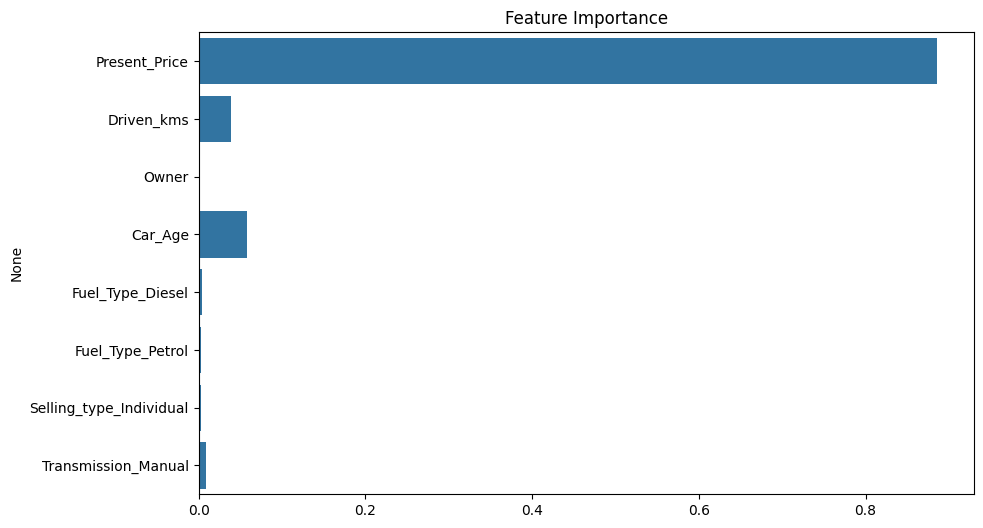

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.show()

#### ===============================
#### 9. Predict on New Data
#### ===============================

In [21]:
print("\nEnter car details to predict selling price:")

present_price = float(input("Present Price (in lakhs): "))
driven_kms = int(input("Driven Kilometers: "))
owner = int(input("Number of previous owners (0/1/2/3): "))
car_age = int(input("Car Age (in years): "))

fuel = input("Fuel Type (Petrol/Diesel/CNG): ").strip().lower()
selling_type = input("Selling Type (Dealer/Individual): ").strip().lower()
transmission = input("Transmission (Manual/Automatic): ").strip().lower()

# Encoding based on training columns
fuel_diesel = 1 if fuel == "diesel" else 0
fuel_petrol = 1 if fuel == "petrol" else 0
selling_individual = 1 if selling_type == "individual" else 0
trans_manual = 1 if transmission == "manual" else 0

user_input = np.array([[present_price, driven_kms, owner, car_age,
                        fuel_diesel, fuel_petrol,
                        selling_individual, trans_manual]])

prediction = model.predict(user_input)

print("\n Estimated Selling Price: ₹", round(prediction[0], 2), "lakhs")


Enter car details to predict selling price:


Present Price (in lakhs):  1.5
Driven Kilometers:  45
Number of previous owners (0/1/2/3):  0
Car Age (in years):  5
Fuel Type (Petrol/Diesel/CNG):  petrol
Selling Type (Dealer/Individual):  Dealer
Transmission (Manual/Automatic):  Manual



 Estimated Selling Price: ₹ 1.74 lakhs


#### ===============================
#### 10 Conclusion
#### ===============================

#### In this project, a car price prediction model was developed using machine learning techniques. After preprocessing and encoding the data, a Random Forest Regressor was trained to learn patterns between car features and selling prices. The model achieved good predictive performance, showing that factors like car age, present price, fuel type, and transmission significantly influence resale value. This project demonstrates how machine learning can assist buyers and sellers in estimating fair car prices.